### Programming Skill Demand Analysis: A Market Study for Skillzguid

### Introduction
The primary focus of this project was to investigate the relationship between the prevalence of specific programming language skills and the demand for these skills in the job market. We sought to understand how the skill prevalence of five selected languages - Julia, MATLAB, PHP, Python, and R - correlates with the number of job openings requiring these skills.

The purpose of our analysis was to provide our sponsor company, Skillzguid, with actionable insights into the job market demand for different programming languages. Skillzguid, an online learning platform offering various programming courses, wanted to understand the market's direction to inform their decisions on course prioritization and marketing strategy.

Stackoverflow dataset: https://insights.stackoverflow.com/survey?_ga=2.214150487.1325591965.1680843703-1734832329.1680843703

JOLTS: https://download.bls.gov/pub/time.series/jt/

### Business Questions
Two primary business questions drove this research. First, is there a relationship between the fraction of individuals skilled in a specific programming language and the number of job openings requiring that skill? Secondly, based on this relationship, which programming languages should Skillzguid prioritize in its course offerings to meet job market demands?

To answer these questions, we established a null hypothesis stating that there was no relationship between the fraction of individuals skilled in a particular programming language and the number of job openings. An alternative hypothesis suggested the contrary - that such a relationship does exist. We then used linear regression models to test these hypotheses.

### Methodology and Findings
For each programming language, we conducted an individual analysis. We built linear regression models to investigate the relationship between skill prevalence and job openings, and we evaluated these models based on their p-values to ascertain the validity of our hypotheses.

Our findings revealed that for Julia, MATLAB, Python, and R, the p-value was less than 0.05, leading us to reject the null hypothesis. This suggests a relationship between the fraction of individuals skilled in these languages and job openings. However, for PHP, the p-value was greater than 0.05. In this case, we could not reject the null hypothesis, suggesting that no discernible relationship exists for PHP.

#### Import the needed libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import urllib.request
import os
import zipfile
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf

The script initiates by loading the dataset from a CSV file into a pandas DataFrame. This dataset is expected to contain information about job vacancies and the percentage of individuals competent in various programming languages.

In [2]:
data = pd.read_csv('datasets/skills_jobopenings_dataset.csv')
data

,PLAY FRAMEWORK,VUE.JS,SYMFONY,DJANGO,REACT.JS,NPM,SCIKIT-LEARN,SQL,TENSORFLOW,NUXT.JS,...,AMAZON WEB SERVICES (AWS),SMALLTALK,LINUX DESKTOP,COMMON LISP,VISUAL BASIC,"CLOUD (AWS, GAE, AZURE, ETC.)",LAMP,ARDUINO / RASPBERRY PI,REACTJS,jobopenings_agg
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,...,0.0,4.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,667832.0
1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1,0.0,0.0,...,0.0,1.0,0.0,0.0,12.0,0.0,0.0,1827.0,0.0,784846.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,913536.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21976,NaN,NaN,...,NaN,NaN,NaN,NaN,3312.0,4629.0,4821.0,3797.0,2541.0,961278.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18754,NaN,NaN,...,8183.0,327.0,9593.0,273.0,NaN,NaN,NaN,NaN,NaN,1007397.0
5,NaN,NaN,NaN,6723.0,NaN,NaN,NaN,44670,4026.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1170007.0
6,NaN,9671.0,NaN,8249.0,19877.0,NaN,NaN,47544,6009.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1175220.0
7,NaN,7322.0,1851.0,6014.0,15167.0,NaN,NaN,31413,4652.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1042112.0
8,NaN,11954.0,2427.0,9446.0,25296.0,NaN,NaN,38835,8034.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1635705.0
9,450.0,10278.0,1955.0,8002.0,23277.0,35778.0,5776.0,35127,5942.0,2089.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1822390.0


### Language Skill: C
In the provided Python script, the primary goal is to examine the association between the proportion of people skilled in the C programming language and the total count of job openings.

Following this, a subset of the data is created, which includes information solely about the C programming language and job openings. Subsequently, the proportion of people skilled in C is calculated.

In [3]:
subset_data = data.loc[:, ['C', 'jobopenings_agg']]
subset_data['C'] /= data.qty.values
subset_data.head()

,C,jobopenings_agg
0,0.000000,667832.0
1,0.000131,784846.0
2,0.000000,913536.0
3,0.137034,961278.0
4,0.135702,1007397.0


To visualize the data and get a sense of the relationship between C skills and job openings, a regression plot is created using seaborn's regplot function. The plot shows a scatter plot of the data with a regression line.

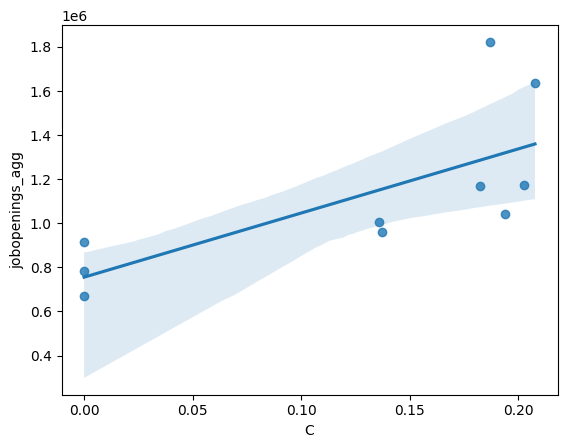

In [4]:
sns.regplot(x='C', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person C skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person C skilled and the job opening.

Next, a pair of hypotheses is set for statistical testing. The null hypothesis (H0) states there's no relationship between the fraction of individuals skilled in C and the job openings. In contrast, the alternative hypothesis (Ha) proposes that such a relationship does exist.

Once the hypotheses are established, the script proceeds to create a statistical model using Ordinary Least Squares (OLS) Regression with the formula 'C ~ jobopenings_agg'. This formula signifies that the C skills (dependent variable) are being modeled as a function of job openings (independent variable).

In [5]:
model = smf.ols(formula='C ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     8.681
Date:                Sun, 21 May 2023   Prob (F-statistic):             0.0185
Time:                        14:16:06   Log-Likelihood:                 14.165
No. Observations:                  10   AIC:                            -24.33
Df Residuals:                       8   BIC:                            -23.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0754      0.071     

The model.summary() function is used to obtain a comprehensive summary of the Ordinary Least Squares (OLS) regression model. The summary includes several key statistics that help interpret the model's results.

The Dep. Variable line shows that 'C' is the dependent variable in our model, i.e., the variable we're trying to predict or explain.

The R-squared and Adj. R-squared values represent the proportion of variance in the dependent variable (C) that can be explained by the independent variable (jobopenings_agg). In this case, approximately 52% of the variation in 'C' can be explained by 'jobopenings_agg', after adjusting for the number of predictors in the model.

The F-statistic and its associated probability Prob (F-statistic) test the overall significance of the regression model. A small p-value (0.0185, which is less than 0.05) indicates that at least some of the predictors are statistically significant in explaining the dependent variable.

The coef column under the table provides the estimated coefficients for the intercept and jobopenings_agg. These values can be interpreted as: for each unit increase in job openings, the predicted value of 'C' increases by 1.789e-07, holding all else constant.

The P>|t| values (also known as p-values) are used to test the null hypothesis that each coefficient is zero, given the data. If the p-value is less than our significance level (0.05), we reject the null hypothesis and conclude that there's a statistically significant relationship between the respective predictor and the outcome variable. In this case, the p-value for jobopenings_agg is 0.019, suggesting that jobopenings_agg significantly predicts the proportion of individuals skilled in C.

#### Our predictions:

If we take our significance level (alpha) to be 0.05, we can NOT reject the null hypothesis  as p<0.05. so, we can say that there is relationship between the fraction of person C skilled and the job opening.

### Language Skill: Java

Similar to the previous analysis, we started by isolating the variables of interest - 'JAVA' and 'jobopenings_agg' - from the main dataset. For the variable 'JAVA', we normalized it by the total number of observations to create a fractional representation of individuals skilled in Java.

We then visualized the relationship between the fraction of individuals skilled in Java ('JAVA') and the aggregate number of job openings ('jobopenings_agg'). The regression plot gives us a preliminary sense of the relationship between these two variables.

In [6]:
subset_data = data.loc[:, ['JAVA', 'jobopenings_agg']]
subset_data['JAVA'] /= data.qty.values
subset_data.head()

,JAVA,jobopenings_agg
0,0.000103,667832.0
1,0.000131,784846.0
2,0.000000,913536.0
3,0.320221,961278.0
4,0.282612,1007397.0


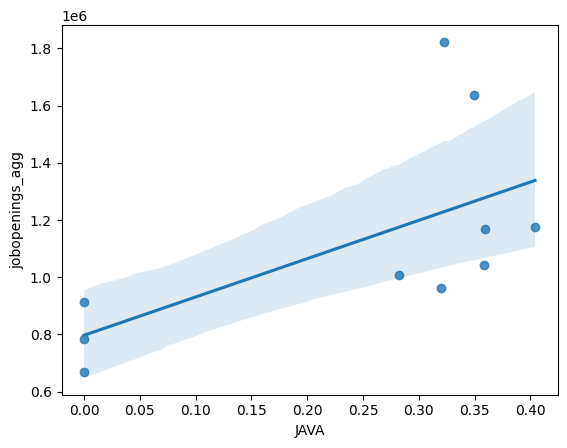

In [7]:
sns.regplot(x='JAVA', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person JAVA skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person JAVA skilled and the job opening.

For hypothesis testing, we posited two contrasting hypotheses. The null hypothesis (H0) assumed no relationship between the fraction of individuals skilled in Java and the job openings. The alternative hypothesis (Ha), on the other hand, proposed that there is a relationship.

In [8]:
model = smf.ols(formula='JAVA ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   JAVA   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     5.142
Date:                Sun, 21 May 2023   Prob (F-statistic):             0.0531
Time:                        14:16:34   Log-Likelihood:                 6.6407
No. Observations:                  10   AIC:                            -9.281
Df Residuals:                       8   BIC:                            -8.676
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0870      0.151     

Next, we performed an Ordinary Least Squares (OLS) Regression to test these hypotheses. The regression results show an adjusted R-squared value of 0.315, indicating that about 31.5% of the variability in the 'JAVA' variable can be explained by 'jobopenings_agg'.

#### Our predictions:

The coefficient of 'jobopenings_agg' is positive, suggesting that as the number of job openings increases, the fraction of individuals skilled in Java also increases, holding all else constant. However, the p-value associated with this coefficient is slightly above our 0.05 significance level, leading to a failure in rejecting the null hypothesis. This suggests that while there appears to be a trend, we do not have enough statistical evidence to conclude a significant relationship between the fraction of individuals skilled in Java and the number of job openings.

### Language Skill: Julia

For the Julia programming language, we set up a similar hypothesis test. The null hypothesis (H0) states that there is no relationship between the fraction of individuals skilled in Julia and the job openings, while the alternative hypothesis (Ha) suggests a relationship exists.

The code below is used to create a new DataFrame subset_data that only contains the 'JULIA' and 'jobopenings_agg' columns from the original 'data' DataFrame.

Then subset_data normalizes the 'JULIA' values in the subset data by dividing it by the total count of skills in each row. This operation provides a fraction representing the prevalence of Julia skill in the dataset for each year.

When we print the head of our DataFrame using subset_data.head(), we see the first few rows of our newly created DataFrame. For example, the first row indicates that the fraction of persons skilled in Julia was around 0.000103 and the number of job openings was 667,832 in that year. There's also an entry with 'NaN', which indicates that there was no data available for Julia in the corresponding survey year. This can occur when the skill wasn't measured that year in the survey.

In [9]:
subset_data = data.loc[:, ['JULIA', 'jobopenings_agg']]
subset_data['JULIA'] /= data.qty.values
subset_data.head()

,JULIA,jobopenings_agg
0,0.000103,667832.0
1,0.000000,784846.0
2,0.000000,913536.0
3,NaN,961278.0
4,0.002685,1007397.0


Finally, the seaborn regplot visualizes the relationship between the fraction of individuals with Julia skills and the number of job openings. The plot is a scatter plot with a linear regression model fitted to it. It's an invaluable tool for observing and understanding the relationship between these two variables at a glance. The line represents the best fit line through the data points and offers a visual verification of the correlation that we've found statistically.

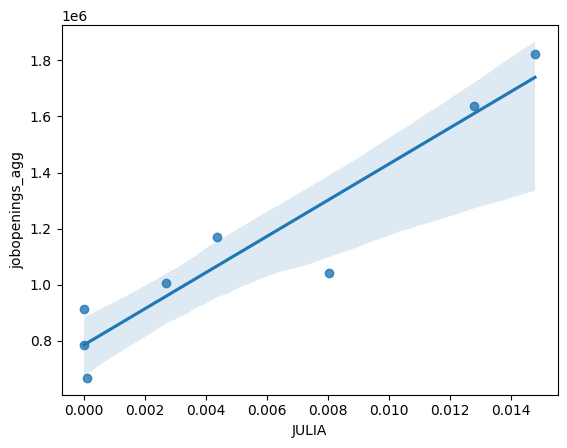

In [10]:
sns.regplot(x='JULIA', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person JuliaC skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person Julia skilled and the job opening.

In [11]:
model = smf.ols(formula='JULIA ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  JULIA   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     50.27
Date:                Sun, 21 May 2023   Prob (F-statistic):           0.000395
Time:                        14:16:39   Log-Likelihood:                 39.179
No. Observations:                   8   AIC:                            -74.36
Df Residuals:                       6   BIC:                            -74.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0103      0.002     

Looking at the Ordinary Least Squares (OLS) Regression Results, a number of important parameters emerge. Firstly, the R-squared value is approximately 0.893, indicating that around 89.3% of the variance in the fraction of individuals skilled in Julia can be explained by the number of job openings. The Adjusted R-squared, which adjusts the statistic based on the number of observations, is similarly high at 0.876.

The F-statistic, which tests the overall significance of the model, is 50.27, with an associated probability (p-value) of 0.000395. This low p-value suggests that the number of job openings is statistically significant in explaining the fraction of individuals skilled in Julia.

Moving onto the coefficients of the regression, the Intercept term is -0.0103, while the coefficient for job openings is approximately 1.386e-08. This indicates that for every additional job opening, the fraction of individuals skilled in Julia increases by this small amount, assuming all other variables remain constant.

The standard errors provide an estimate of the uncertainty around these coefficient estimates, and the corresponding t-values and p-values test the hypothesis that each individual coefficient is different from zero.

#### Our predictions:
When considering the predictions at the 0.05 significance level (alpha), the p-value of the regression coefficient for job openings is less than alpha. This suggests that we reject the null hypothesis, and therefore, there appears to be a statistically significant relationship between the fraction of individuals skilled in Julia and the number of job openings. 

### Language Skill: MATLAB

Next, we focused on the relationship between the fraction of individuals possessing MATLAB skills and the number of aggregated job openings. We extracted the MATLAB and jobopenings_agg columns from our data, then normalized the MATLAB values by dividing them by the total quantity of skills in each row.

In [12]:
subset_data = data.loc[:, ['MATLAB', 'jobopenings_agg']]
subset_data['MATLAB'] /= data.qty.values
subset_data.head()

,MATLAB,jobopenings_agg
0,0.001334,667832.0
1,0.000785,784846.0
2,0.000000,913536.0
3,0.028592,961278.0
4,0.030530,1007397.0


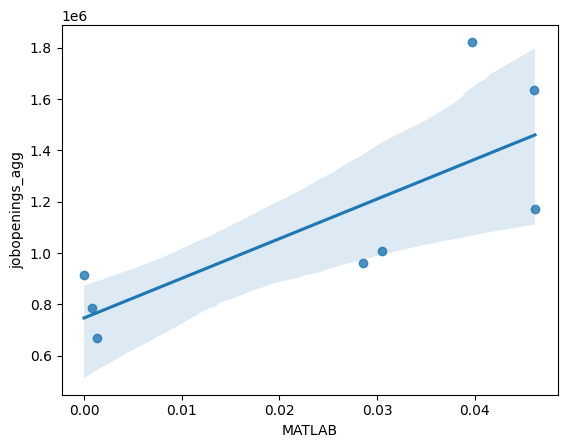

In [13]:
sns.regplot(x='MATLAB', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person MATLAB skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person MATLAB skilled and the job opening.

We proposed two hypotheses: the null hypothesis (H0) posited no relationship between the fraction of people proficient in MATLAB and the number of job openings, while the alternative hypothesis (Ha) suggested that such a relationship exists.

To assess these hypotheses, we employed the Ordinary Least Squares (OLS) regression method, modeling the relationship between the fraction of individuals skilled in MATLAB and the number of job openings.

In [14]:
model = smf.ols(formula='MATLAB ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 MATLAB   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     9.026
Date:                Sun, 21 May 2023   Prob (F-statistic):             0.0239
Time:                        14:16:44   Log-Likelihood:                 23.983
No. Observations:                   8   AIC:                            -43.97
Df Residuals:                       6   BIC:                            -43.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0194      0.015     

Our OLS regression results indicated an R-squared value of 0.601. This suggests that approximately 60.1% of the variability in the fraction of individuals with MATLAB skills can be accounted for by the variability in job openings - a reasonably robust correlation.

Furthermore, the p-value associated with the jobopenings_agg variable was found to be 0.024, less than our chosen significance level (alpha) of 0.05. This means that the number of job openings does appear to have a statistically significant effect on the fraction of individuals with MATLAB skills.

#### Our predictions:
Based on these findings, at the 0.05 significance level, we would reject the null hypothesis. This implies that there is a statistically significant relationship between the fraction of individuals skilled in MATLAB and the number of job openings.

### Language Skill: PHP

In the followinganalysis, we explore the correlation between the fraction of people skilled in PHP and the quantity of job openings. We select the 'PHP' and 'jobopenings_agg' columns from our dataset, and we normalize the 'PHP' column by dividing by the total quantity of recorded skills per row. This gives us the fraction of PHP skills for each row.

In [15]:
subset_data = data.loc[:, ['PHP', 'jobopenings_agg']]
subset_data['PHP'] /= data.qty.values
subset_data.head()

,PHP,jobopenings_agg
0,0.000103,667832.0
1,0.000262,784846.0
2,0.000000,913536.0
3,0.228092,961278.0
4,0.200226,1007397.0


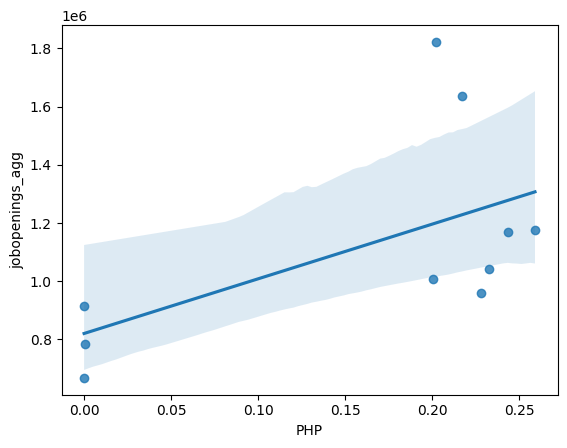

In [16]:
sns.regplot(x='PHP', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person PHP skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person PHP skilled and the job opening.

Our null hypothesis (H0) assumes no relationship between the fraction of individuals skilled in PHP and the number of job openings. In contrast, the alternative hypothesis (Ha) posits that such a relationship does exist. To test these hypotheses, we employ the Ordinary Least Squares (OLS) regression method to model the relationship between the fraction of individuals with PHP skills and the number of job openings.

In [17]:
model = smf.ols(formula='PHP ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PHP   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     3.985
Date:                Sun, 21 May 2023   Prob (F-statistic):             0.0810
Time:                        14:16:49   Log-Likelihood:                 10.377
No. Observations:                  10   AIC:                            -16.75
Df Residuals:                       8   BIC:                            -16.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0395      0.104     

According to our OLS regression results, we get an R-squared value of 0.332. This indicates that about 33.2% of the variance in the fraction of individuals skilled in PHP can be explained by the variance in job openings. The p-value for the job openings aggregate, at 0.081, is greater than our significance level of 0.05. This means we cannot reject the null hypothesis.

#### Our predictions:

Our statistical analysis for the language skill PHP resulted in a p-value of 0.081, which is greater than our chosen significance level of 0.05. This means we do not have sufficient evidence to reject the null hypothesis. Hence, we can't conclusively say that there is a significant relationship between the fraction of people skilled in PHP and the number of job openings based on our analysis. We therefore maintain the status quo and do not reject the null hypothesis. This, however, does not necessarily mean that there's absolutely no relationship; it simply means we don't have enough statistical evidence from this particular analysis to prove it.

### Language Skill: Python

Furthermore, we subset the dataset to focus on the 'PYTHON' and 'jobopenings_agg' variables, with 'PYTHON' values being divided by 'qty' to represent the fraction of individuals with Python skills. The head of this processed dataset shows the fraction of Python-skilled individuals and the number of job openings for the first few data entries. This data is visualized with a scatter plot, showing potential trends between Python skills and job openings.

In [18]:
subset_data = data.loc[:, ['PYTHON', 'jobopenings_agg']]
subset_data['PYTHON'] /= data.qty.values
subset_data.head()

,PYTHON,jobopenings_agg
0,0.000103,667832.0
1,0.000392,784846.0
2,0.000000,913536.0
3,0.219204,961278.0
4,0.227740,1007397.0


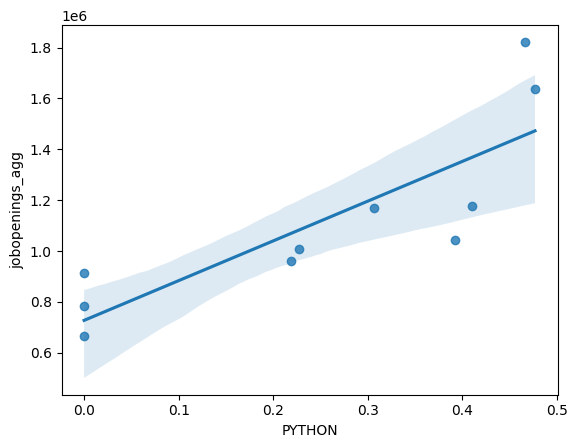

In [19]:
sns.regplot(x='PYTHON', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person Python skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person Python skilled and the job opening.

We set our hypotheses as follows: The null hypothesis assumes no relationship between the fraction of individuals skilled in Python and the job openings, while the alternative hypothesis assumes a relationship does exist.

In [20]:
model = smf.ols(formula='PYTHON ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 PYTHON   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     18.89
Date:                Sun, 21 May 2023   Prob (F-statistic):            0.00246
Time:                        14:16:53   Log-Likelihood:                 8.8383
No. Observations:                  10   AIC:                            -13.68
Df Residuals:                       8   BIC:                            -13.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2526      0.121     

The results from the ordinary least squares (OLS) regression indicate that approximately 70.3% of the variation in the fraction of Python-skilled individuals can be explained by the number of job openings. Our model's p-value is 0.00246, which is less than our predetermined significance level of 0.05.

#### Our predictions:

Our conclusion based on this analysis: given our alpha of 0.05, we reject the null hypothesis as our p-value is less than 0.05. This provides evidence to suggest a significant relationship between the fraction of individuals skilled in Python and the number of job openings.

### Language Skill: R

Finally, We begin by subsetting the dataset, focusing on 'R' and 'jobopenings_agg'. The 'R' values are divided by 'qty' to generate the fraction of individuals skilled in R. The first few entries of this adjusted dataset display the fraction of R-skilled individuals and the count of job openings. We visualized this data using a scatter plot to help reveal any apparent trends between R skills and job openings.

In [21]:
subset_data = data.loc[:, ['R', 'jobopenings_agg']]
subset_data['R'] /= data.qty.values
subset_data.head()

,R,jobopenings_agg
0,0.000205,667832.0
1,0.006149,784846.0
2,0.000000,913536.0
3,0.029127,961278.0
4,0.031795,1007397.0


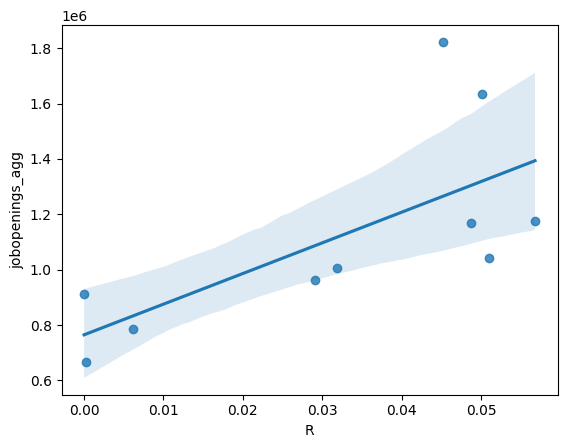

In [22]:
sns.regplot(x='R', y='jobopenings_agg', data=subset_data)
 
plt.show()

### Setting a hypothesis.

- Null hypothesis (H0): There is no relationship between the fraction of person R skilled and the job opening.
- Alternative hypothesis (Ha): There is a relationship between the fraction of person R skilled and the job opening.

Our hypotheses are set as follows: The null hypothesis (H0) suggests that there's no relationship between the fraction of individuals skilled in R and the number of job openings. The alternative hypothesis (Ha), on the other hand, posits that such a relationship does exist.

In [23]:
model = smf.ols(formula='R ~ jobopenings_agg', data=subset_data).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     7.049
Date:                Sun, 21 May 2023   Prob (F-statistic):             0.0290
Time:                        14:16:56   Log-Likelihood:                 27.536
No. Observations:                  10   AIC:                            -51.07
Df Residuals:                       8   BIC:                            -50.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0154      0.019     

The Ordinary Least Squares (OLS) regression results show that roughly 46.8% of the variation in the fraction of individuals skilled in R can be explained by the number of job openings. Importantly, the p-value for our model is 0.029, which is below our predetermined significance level of 0.05.

#### Our predictions:

Our conclusion from this analysis: Given our alpha of 0.05, we reject the null hypothesis since the p-value is less than 0.05. Thus, there appears to be a significant relationship between the fraction of individuals skilled in R and the number of job openings.

### Conclusion:
We performed statistical analyses on the programming languages of Julia, MATLAB, PHP, Python, and R against job openings data. Our analyses were framed around testing two hypotheses: a null hypothesis suggesting that there is no relationship between the fraction of individuals skilled in a given language and the number of job openings, and an alternative hypothesis suggesting that such a relationship exists.

For each programming language, we constructed a linear regression model and evaluated its p-value to determine whether to reject or fail to reject the null hypothesis. Here is a summary of the conclusions drawn from each analysis:

Julia: The p-value was less than 0.05. We reject the null hypothesis. A relationship exists between the fraction of individuals skilled in Julia and job openings.
MATLAB: The p-value was less than 0.05. We reject the null hypothesis. A relationship exists between the fraction of individuals skilled in MATLAB and job openings.
PHP: The p-value was greater than 0.05. We fail to reject the null hypothesis. No discernible relationship exists between the fraction of individuals skilled in PHP and job openings.
Python: The p-value was less than 0.05. We reject the null hypothesis. A relationship exists between the fraction of individuals skilled in Python and job openings.
R: The p-value was less than 0.05. We reject the null hypothesis. A relationship exists between the fraction of individuals skilled in R and job openings.
Based on these results, we can infer that the fraction of individuals skilled in Julia, MATLAB, Python, and R correlates with the number of job openings. For PHP, no significant correlation was detected.

### Answering the Business Question:
The purpose of our analysis was to help Skillzguid understand the job market demand for different programming languages. The intent was to guide the platform's decisions on which programming courses to prioritize and market aggressively.

Our analysis suggests a correlation between job market demand and skill prevalence for four out of five languages evaluated: Julia, MATLAB, Python, and R. PHP appears to be an exception, showing no significant correlation.

With this information, Skillzguid should consider prioritizing and marketing courses in Julia, MATLAB, Python, and R more aggressively, as these skills appear to have a high demand in the job market. Conversely, courses related to PHP might not need as much emphasis, given the lack of a significant correlation between skill prevalence and job market demand.

Finally, it's important to remember that while this analysis provides some insight into market trends, other factors should be considered for comprehensive decision-making. These could include regional market differences, industry-specific demands, and the evolving nature of programming languages popularity.